# 🕺 인도 춤 이미지 분류

## <예시 이미지>
<div>
    <img src="./datasets/dance/original/bharatanatyam/bharatanatyam_20.jpg" width=530px>   
    <img src="./datasets/dance/original/bharatanatyam/bharatanatyam_10.jpg" width=300px>      
</div>


## 1. 데이터 전처리
---
#### 가. target 의 명칭이 csv 로 저장되어 있어 image name과 dataframe 명칭이 같은 데이터에 대하여 파일명 변경.
#### 나. 기존 1개로 합쳐져 있던 이미지에 대하여 shutil을 사용하여 train, validation, test 구분.

In [ ]:
import pandas as pd 

train_df = pd.read_csv('./datasets/dance/train.csv')
test_df = pd.read_csv('./datasets/dance/test.csv')

# 기존에 있던 데이터 프레임에 대햐여 결합

d_df = pd.concat([train_df, test_df],axis =0)
d_df

In [ ]:
# 데이터 프레임 copy
pre_d_df = d_df.copy()
pre_d_df

In [ ]:
# .jpg를 추출 후 숫자만 으로 새로운 feature 생성
# 숫자 추출: str.extract(r'(\d+)')를 사용하여 'Image' 열의 문자열에서 숫자 부분만 추출합니다.
# 정규 표현식 r'(\d+)'는 하나 이상의 숫자(digit)를 의미


pre_d_df['image_number'] = pre_d_df['Image'].str.extract(r'(\d+)').astype(int)
pre_d_df

In [ ]:
# 숫자별로 정렬 후 신규 index 번호 생성
pre_d_df = pre_d_df.sort_values(by='image_number').reset_index(drop=True)
pre_d_df

In [ ]:
# 결측치에 대해서 새로운 target 이름으로 대체
pre_d_df = pre_d_df.fillna('other')
pre_d_df = pre_d_df.drop(labels= ['image_number'], axis =1)
pre_d_df

In [ ]:
pre_d_df.target.value_counts()

In [ ]:
import os
import shutil
from glob import glob

# 원본 이미지가 있는 폴더
test_folder_root = "./datasets/dance/test_original/"
train_folder_root = "./datasets/dance/train_original/"

# 새 디렉토리
destination_folder = './datasets/dance/original/'

# 이미지 파일 확장자 (필요에 따라 추가/변경)
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.gif']

# 이미지 파일 목록을 가져오기 (하위 디렉토리를 포함한 모든 이미지 파일을 가져옵니다.)
image_files = []
for ext in image_extensions:
    image_files.extend(glob(os.path.join(test_folder_root, '**', ext), recursive=True))
    image_files.extend(glob(os.path.join(train_folder_root, '**', ext), recursive=True))

# 이미지 파일 복사
for file_path in image_files:
    if file_path.startswith(test_folder_root):
        relative_path = os.path.relpath(file_path, test_folder_root)
    elif file_path.startswith(train_folder_root):
        relative_path = os.path.relpath(file_path, train_folder_root)
    
    destination = os.path.join(destination_folder, relative_path)
    
    # 디렉토리가 존재하지 않으면 생성
    if not os.path.exists(os.path.dirname(destination)):
        os.makedirs(os.path.dirname(destination))
    
    # 파일 복사
    shutil.copy2(file_path, destination)

print("이미지 파일 복사 완료")


In [ ]:
# import shutil
# # original 폴더에 있는 이미지에 대하여 cateogory 별로 폴더 생성 후 이미지 이동

# # 우선 target 의 unique 값에 대하여 디렉토리 생성

# root = './datasets/dance/dance'

# target_list = list(pre_d_df.target.unique())
# target_list

# for target in target_list:
#     target_dir = os.path.join(root, target)
#     if not os.path.exists(target_dir):
#         os.makedirs(target_dir)

# print('완료')

In [ ]:
# 폴더에 있는 이미지 명칭 가져오기
pre_d_df

In [ ]:
import os
from glob import glob

# 데이터프레임에 있는 value 값과 이미지의 이름이 같으면 해당 이름으로 파일명 변경

# original 폴더의 파일명 가져오기

root = './datasets/dance/original/'

directories = glob(os.path.join(root, '*'))

for file_path in directories:
    old_name = os.path.basename(file_path)  # 플랫폼 독립적으로 디렉토리 이름 추출

    # 데이터프레임에서 해당 파일 이름을 가진 행 찾기
    match_location = pre_d_df[pre_d_df['Image'] == old_name]
    # print(match_location)

    # 만약 해당 결로에 파일이 있으면
    if not match_location.empty:
        target = match_location['target'].values[0]
        new_name = f'{target}_1.jpg'
        new_file_path = os.path.join(root, new_name)

        # 새로운 파일 이름이 중복되는지 확인하고, 중복을 피하기 위해 숫자 추가
        count = 0
        while os.path.exists(new_file_path):
            new_name = f'{target}_{count + 1}.jpg'
            new_file_path = os.path.join(root, new_name)
            count += 1

        os.rename(file_path, new_file_path)

print("파일 이름 변경 완료")
        
    


In [ ]:
# original 폴더에 있는 이미지 directory 분류하여 이동

In [ ]:
# 테스트 폴더에 category 없이 이미지만 존재하여 카케고리 폴더를 생성 후 해당 이름에 맞게 copy
import os
import shutil
from glob import glob

# 원본 이미지가 있는 폴더
origin_root = "./datasets/dance/original/"

# 파일 목록을 가져오기 (하위 디렉토리를 포함한 모든 이미지 파일을 가져옵니다.)
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.gif']
image_files = []
for ext in image_extensions:
    image_files.extend(glob(os.path.join(origin_root, ext)))

# 이미지 파일을 상위 폴더 이름에 맞게 이동
for file_path in image_files:
    # 파일 이름 추출
    file_name = os.path.basename(file_path)
    
    # 파일 이름에서 폴더 이름 추출 (예: 'kathakali_20.jpg'에서 'kathakali' 추출)
    folder_name = file_name.rsplit('_', 1)[0]
    
    # 새 디렉토리 경로 설정
    new_folder_path = os.path.join(origin_root, folder_name)
    # print(new_folder_path)
    
    # 새 디렉토리가 존재하지 않으면 생성
    if not os.path.exists(new_folder_path):
        os.makedirs(new_folder_path)
    
    # 파일을 새 디렉토리로 이동
    new_file_path = os.path.join(new_folder_path, file_name)
    shutil.move(file_path, new_file_path)

print("이미지 파일 이동 완료")


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/dance/original/'

image_data_generator = ImageDataGenerator(rescale =1./255)

generator = image_data_generator.flow_from_directory(
    root,
    target_size = (244, 244),
    batch_size=16,
    class_mode='categorical'
)

print(generator.class_indices)

Found 520 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [4]:
import pandas as pd

d_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
# s_df.loc[:, 'file_paths'] = x_df.file_paths.apply(lambda x: x.replace('\\', '/'))
# s_df.file_paths.iloc[:1]

original_max_colwidth = pd.get_option('display.max_colwidth')

# 생략 없이 전체 경로가 출력되도록 설정
pd.set_option('display.max_colwidth', None)

# DataFrame 출력
print(d_df.file_paths.iloc[:1])

# 원래 설정 값으로 복원
pd.set_option('display.max_colwidth', original_max_colwidth)

d_df


0    ./datasets/dance/original/bharatanatyam/bharatanatyam_1.jpg
Name: file_paths, dtype: object


,file_paths,targets
0,./datasets/dance/original/bharatanatyam/bharat...,0
1,./datasets/dance/original/bharatanatyam/bharat...,0
2,./datasets/dance/original/bharatanatyam/bharat...,0
3,./datasets/dance/original/bharatanatyam/bharat...,0
4,./datasets/dance/original/bharatanatyam/bharat...,0
...,...,...
515,./datasets/dance/original/sattriya/sattriya_5.jpg,8
516,./datasets/dance/original/sattriya/sattriya_6.jpg,8
517,./datasets/dance/original/sattriya/sattriya_7.jpg,8
518,./datasets/dance/original/sattriya/sattriya_8.jpg,8


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(d_df.file_paths, d_df.targets, stratify=d_df.targets, test_size=0.2, random_state=124)

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

print(X_train.count())
print(X_val.count())

332
84


In [31]:
import shutil
import os

root = './datasets/dance'

for file_path in X_train:
    dance_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + dance_dir)
    # print(destination)
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [32]:
import shutil
import os

root = './datasets/dance'

for file_path in X_val:
    dance_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + dance_dir)
    
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [33]:
import shutil
import os

root = './datasets/dance'

for file_path in X_test:
    dance_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'test/' + dance_dir)
    
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

## 2. 데이터 훈련
---
#### 가. 영상의 수가 작기 때문에 Convolution backborn 에서 랜덤한 이미지를 사용하기 위해 albumentations 함수 선언.
#### 나. callback 을 사용하여 모델 훈련 시 val_loss 값에 따라 EarlyStopping, ReduceLROnPlateau을 적용하고 가중치를 저장하기 위해 ModelCheckpoint사용.
#### 다. 이미지를 훈련 모델로 사용하기 위해 ImageDataGenerator를 사용하여 train_data_generator, validation_data_generator, test_data_generator 객체 생성.
- 이때, train_data_generator에서 albumentations 적용한 ImageDataGenerator를 사용 (preprocessing_function=trainform)

In [5]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


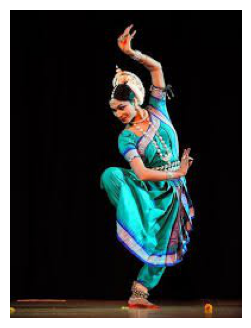

In [8]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_generator.filepaths[200]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

## Cycle01 
---
1. image size는 244 고정, input_tensor 차원 = 3 차원 객체 생성.
2. Conv2D를 사용하여 filter 개수 64 -> 64 -> 128 -> 256 으로 선언.
   > 가. output 의 개수를 증가하여 훈련 데이터의 정확도를 높이고자 생각 하였습니다.
   > 나. kernel_size = (3, 3), padding='same'을 적용하여 이미지 크기는 유지 하였으며, 3,4 Layer에서 Maxpooling2D(2) 를 적용하여 이미지 size를 줄였습니다.
   > 다. 2,3,4 layer 에서 가중치 초기화와, 1,2,3,4 배치 초기화를 적용하여 모델의 일반화를 고려하였습니다.

3. epochs=2 훈련 시 val_loss 값이 줄어들여 epochs 증가 후 추가 훈련.
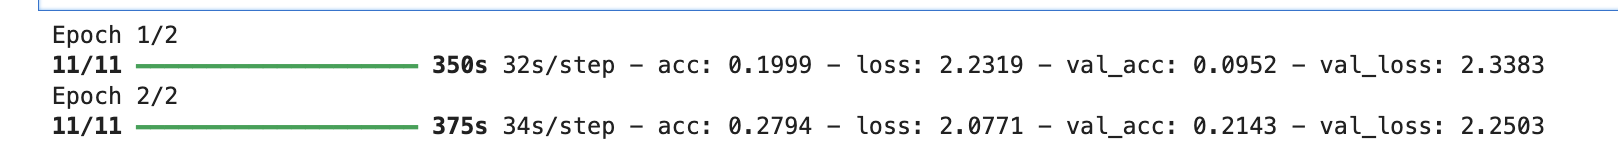  
  
4. 학습률이 동적으로 수정되었고 epochs 수가 증가되었지만 loss 값이 발산하는 추세 확인.
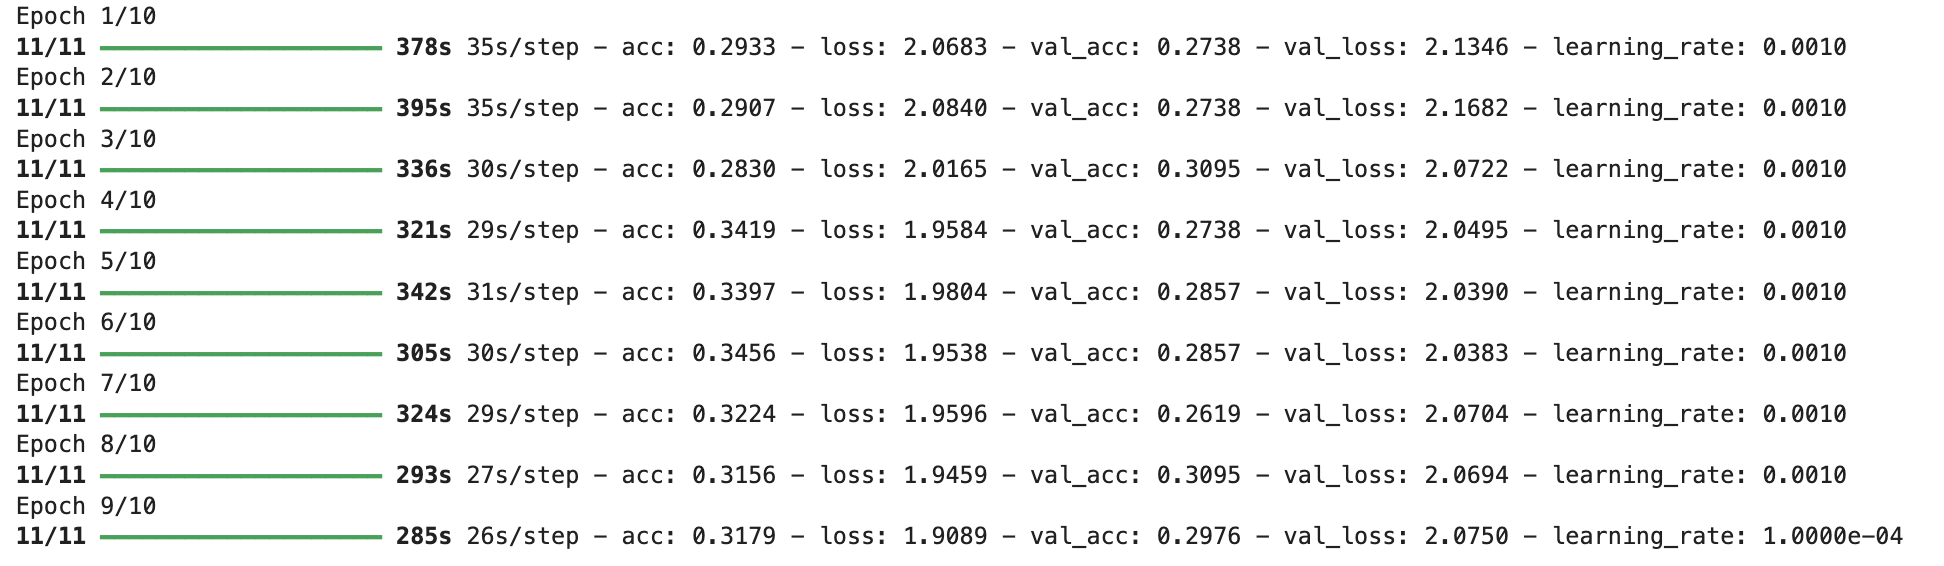


In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3)(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = GlobalAveragePooling2D()(x)
# x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 244, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 244, 244, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 244, 244, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 244, 244, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 244, 244, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 61, 61, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 61, 61, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,913 (2.11 MB)

 Trainable params: 550,761 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [45]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [14]:
mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min',
    verbose= 1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    verbose= 1
)

In [48]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=2,
                    validation_data=validation_generator
                    # callbacks = [mcp_cb, rlr_cb, ely_cb]
                    # callbacks = [rlr_cb]
                   )

Epoch 1/2
11/11 ━━━━━━━━━━━━━━━━━━━━ 350s 32s/step - acc: 0.1999 - loss: 2.2319 - val_acc: 0.0952 - val_loss: 2.3383
Epoch 2/2
11/11 ━━━━━━━━━━━━━━━━━━━━ 375s 34s/step - acc: 0.2794 - loss: 2.0771 - val_acc: 0.2143 - val_loss: 2.2503


In [49]:
model.evaluate(test_generator, batch_size=16)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - acc: 0.1651 - loss: 2.3056


[2.31376576423645, 0.17307692766189575]

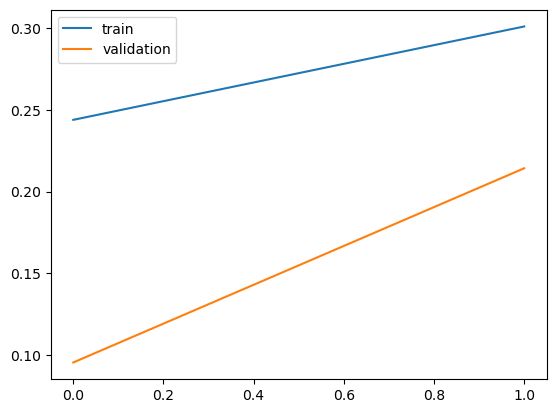

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

# 기존 좋았던 모델에서 epoch를 증가시켜 다시 테스트

In [52]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 378s 35s/step - acc: 0.2933 - loss: 2.0683 - val_acc: 0.2738 - val_loss: 2.1346 - learning_rate: 0.0010
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 395s 35s/step - acc: 0.2907 - loss: 2.0840 - val_acc: 0.2738 - val_loss: 2.1682 - learning_rate: 0.0010
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 336s 30s/step - acc: 0.2830 - loss: 2.0165 - val_acc: 0.3095 - val_loss: 2.0722 - learning_rate: 0.0010
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 321s 29s/step - acc: 0.3419 - loss: 1.9584 - val_acc: 0.2738 - val_loss: 2.0495 - learning_rate: 0.0010
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 342s 31s/step - acc: 0.3397 - loss: 1.9804 - val_acc: 0.2857 - val_loss: 2.0390 - learning_rate: 0.0010
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 305s 30s/step - acc: 0.3456 - loss: 1.9538 - val_acc: 0.2857 - val_loss: 2.0383 - learning_rate: 0.0010
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 324s 29s/step - acc: 0.3224 - loss: 1.9596 - val_acc: 0.2619 - val_loss: 2.0704 - learning_rate: 0.0010
Epoch 

In [53]:
model.evaluate(test_generator, batch_size=16)

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - acc: 0.3018 - loss: 2.0862


[2.095912218093872, 0.2884615361690521]

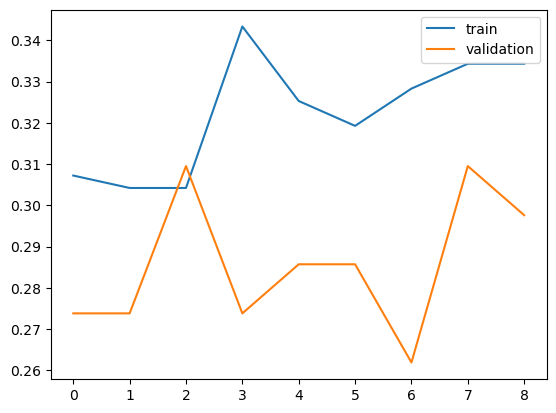

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

## Cycle02
---
1. image size는 244 고정, input_tensor 차원 = 3 차원 객체 생성.
2. Conv2D를 사용하여 filter 개수 64 -> 128 -> 128 -> 256 으로 선언.
   > 가. kernel_size = (3, 3), padding='same'을 적용하여 이미지 크기는 유지 하였으며, 3,4 Layer에서 Maxpooling2D(2) 를 적용하여 이미지 size를 줄였습니다.
   > 나. 2,3,4 layer 에서 가중치 초기화와, 1,2,3,4 배치 초기화를 적용하여 모델의 일반화를 고려하였습니다.
   > 다. 분류기에서 DNN 을 사용하여 히든층을 100, 50으로 추가하여 분류의 성능을 높이려고 하였습니다.

3. **이미지의 크기가 다르고 target 위치가 다를 수 도 있다고 판단하여 albumentations 추가.**
        A.RandomResizedCrop(height=244, width=244, scale=(0.2, 0.7), p=0.5)
  
4. val_loss 값이 작아지다 다시 발산하는 추세를 보이며 정확도가 0.1 ~ 0.3 에서 측정 되는 증상 확인.



In [25]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        # 이미지의 크기가 다르고 target 위치가 다를 수 도 있다고 판단
        A.RandomResizedCrop(height=244, width=244, scale=(0.2, 0.7), p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, strides=1)(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
# x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 244, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 244, 244, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 244, 244, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 244, 244, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 122, 122, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 122, 122, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 61, 61, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 61, 61, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,913 (2.11 MB)

 Trainable params: 550,761 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [30]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10


KeyboardInterrupt: 

## Cycle03
---
1. image size는 244 고정, input_tensor 차원 = 3 차원 객체 생성.
2. Conv2D를 사용하여 filter 개수 64 -> 128 -> 128 -> 256-> 512 으로 선언. (Conv2D 증가)
   > 가. Maxpooling을 사용하여 이미지 사이즈를 초반 layer 에서 줄였으며, 뒤쪽에서는 stride를 사용하였습니다.
   > 나. 분류기에 진입 전 이미지 사이즈를 줄여서 불필요한 가중치를 제거하자고 생각하였습니다.

3. **모델 훈련 시 batch size를 줄여 update 횟수를 높여 평가지표의 추세를 확인하며, 검증 정확도를 높이려 하였습니다.**

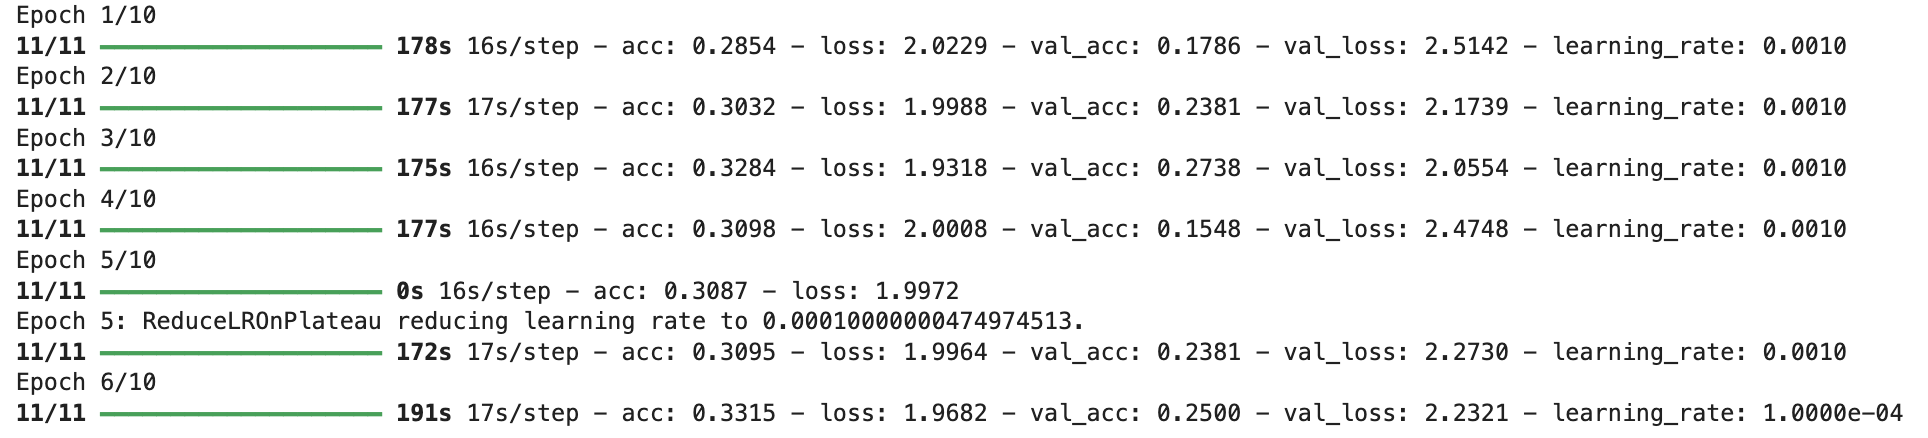


In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, strides=1)(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
# x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 244, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 244, 244, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 244, 244, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 244, 244, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 122, 122, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 122, 122, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 61, 61, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 61, 61, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 61, 61, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 61, 61, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 61, 61, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 61, 61, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,759,721 (6.71 MB)

 Trainable params: 1,757,545 (6.70 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [34]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 163s 15s/step - acc: 0.2625 - loss: 2.2350 - val_acc: 0.0952 - val_loss: 6.1631 - learning_rate: 0.0010
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 172s 15s/step - acc: 0.2730 - loss: 2.1220 - val_acc: 0.0952 - val_loss: 3.8284 - learning_rate: 0.0010
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 174s 16s/step - acc: 0.3074 - loss: 1.9786 - val_acc: 0.1190 - val_loss: 3.6038 - learning_rate: 0.0010


# batch size를 줄여 정확도를 높임
- 중단되는 이유를 알기 위해 callback Early stopping verbose =1 추가)

In [38]:
history = model.fit(train_generator,
                    batch_size=8,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 178s 16s/step - acc: 0.2854 - loss: 2.0229 - val_acc: 0.1786 - val_loss: 2.5142 - learning_rate: 0.0010
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 177s 17s/step - acc: 0.3032 - loss: 1.9988 - val_acc: 0.2381 - val_loss: 2.1739 - learning_rate: 0.0010
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 175s 16s/step - acc: 0.3284 - loss: 1.9318 - val_acc: 0.2738 - val_loss: 2.0554 - learning_rate: 0.0010
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 177s 16s/step - acc: 0.3098 - loss: 2.0008 - val_acc: 0.1548 - val_loss: 2.4748 - learning_rate: 0.0010
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - acc: 0.3087 - loss: 1.9972 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 ━━━━━━━━━━━━━━━━━━━━ 172s 17s/step - acc: 0.3095 - loss: 1.9964 - val_acc: 0.2381 - val_loss: 2.2730 - learning_rate: 0.0010
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 191s 17s/step - acc: 0.3315 - loss: 1.9682 - val_acc: 0.2500 - val_loss: 2.2321 - learning_rate: 1.0000e-0

In [40]:
model.evaluate(test_generator, batch_size=8)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - acc: 0.2284 - loss: 2.1608


[2.217392921447754, 0.21153846383094788]

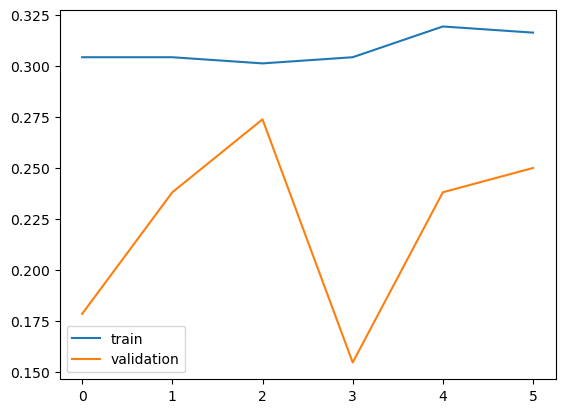

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

## Cycle04
---
1. **Conv2D를 사용하여 filter 개수 128 -> 128 -> 256 -> 256 으로 선언.**
   > 가. filter 의 개수를 높은 값 부터 시작하여 민감도를 높여 분류기에서 다수를 분류하려고 판단하였습니다.
   > 나. 분류기에서 Dropout을 사용하여 loss와 val_locc값의 차이를 줄이려고 하였습니다.

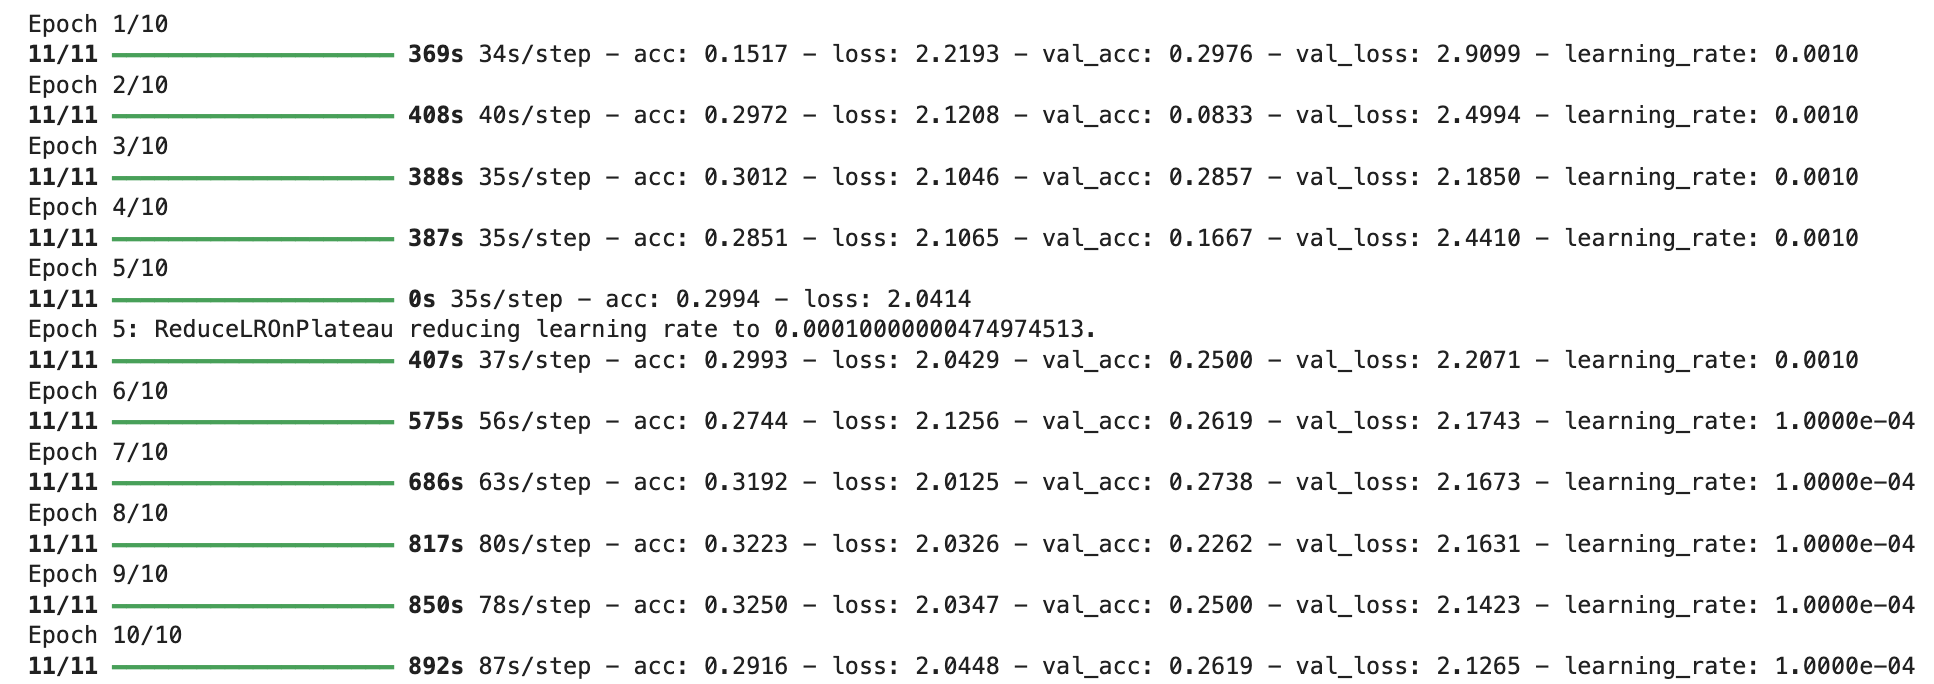

In [42]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.3),
        # 이미지의 크기가 다르고 target 위치가 다를 수 도 있다고 판단
        A.RandomResizedCrop(height=244, width=244, scale=(0.1, 0.5), p=0.5),
        A.ChannelShuffle(p=0.8),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=128, kernel_size=3, strides=1)(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
x = Dense(500, activation='relu')(x)
x = Dropout(rate=0.4)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(rate=0.2)(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 244, 244, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 244, 244, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 122, 122, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 122, 122, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 122, 122, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 122, 122, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 122, 122, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 122, 122, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 500)            │       128,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 50)             │        15,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333,797 (5.09 MB)

 Trainable params: 1,332,261 (5.08 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [46]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [47]:
history = model.fit(train_generator,
                    batch_size=8,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 369s 34s/step - acc: 0.1517 - loss: 2.2193 - val_acc: 0.2976 - val_loss: 2.9099 - learning_rate: 0.0010
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 408s 40s/step - acc: 0.2972 - loss: 2.1208 - val_acc: 0.0833 - val_loss: 2.4994 - learning_rate: 0.0010
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 388s 35s/step - acc: 0.3012 - loss: 2.1046 - val_acc: 0.2857 - val_loss: 2.1850 - learning_rate: 0.0010
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 387s 35s/step - acc: 0.2851 - loss: 2.1065 - val_acc: 0.1667 - val_loss: 2.4410 - learning_rate: 0.0010
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35s/step - acc: 0.2994 - loss: 2.0414 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 ━━━━━━━━━━━━━━━━━━━━ 407s 37s/step - acc: 0.2993 - loss: 2.0429 - val_acc: 0.2500 - val_loss: 2.2071 - learning_rate: 0.0010
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 575s 56s/step - acc: 0.2744 - loss: 2.1256 - val_acc: 0.2619 - val_loss: 2.1743 - learning_rate: 1.0000e-0

## Cycle05
---
1. Conv2D를 사용하여 filter 개수 128 -> 128 -> 256 -> 256-> 512 으로 선언.
   > feature born 을 깊게 하여 이미지의 훈련 개수를 높이려고 하였습니다.

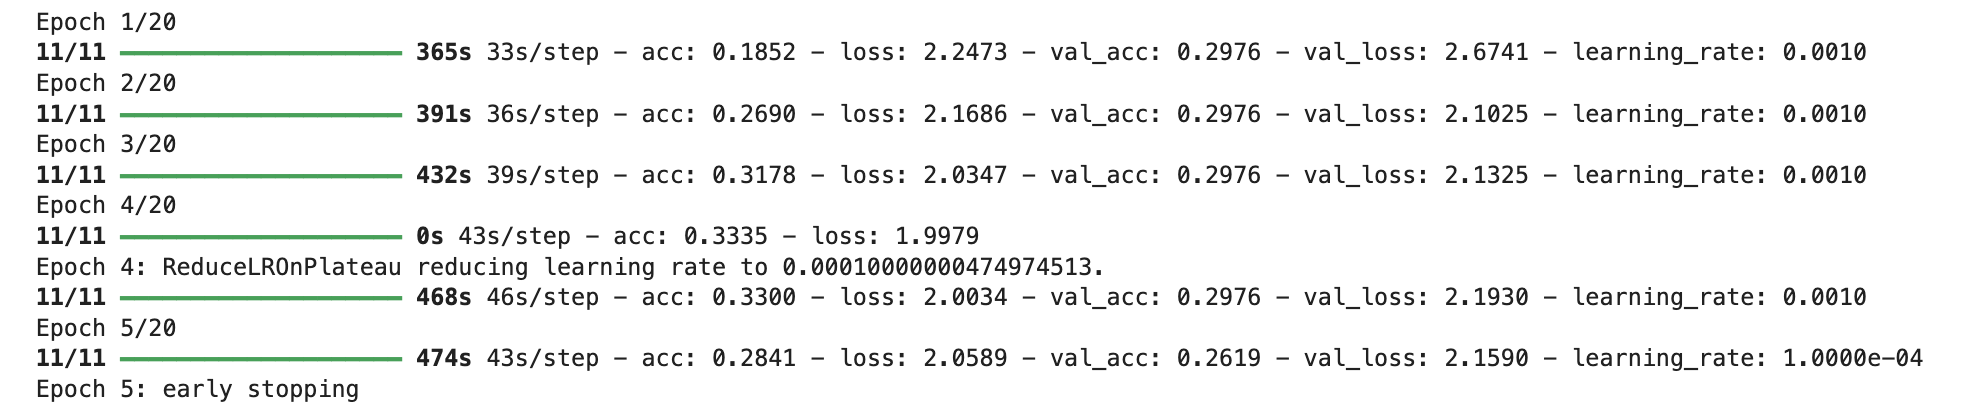

#### feature map 추가
- filter 512 추가 해서 훈련 진행 (오히려 일반화가 진행될수록 정확도는 떨어질 수 있다는 생각) 

In [59]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.3),
        # 이미지의 크기가 다르고 target 위치가 다를 수 도 있다고 판단
        A.RandomResizedCrop(height=244, width=244, scale=(0.1, 0.5), p=0.3),
        A.ChannelShuffle(p=0.3),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [61]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=3, strides=1)(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.4)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.2)(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 244, 244, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 244, 244, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_69 (Activation)      │ (None, 244, 244, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 244, 244, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 244, 244, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_70 (Activation)      │ (None, 244, 244, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 244, 244, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_71 (Activation)      │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 122, 122, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 122, 122, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_72 (Activation)      │ (None, 122, 122, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 122, 122, 512)  │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 122, 122, 512)  │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_73 (Activation)      │ (None, 122, 122, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_15     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 50)             │         5,05

 Total params: 1,629,353 (6.22 MB)

 Trainable params: 1,627,369 (6.21 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [62]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [63]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 365s 33s/step - acc: 0.1852 - loss: 2.2473 - val_acc: 0.2976 - val_loss: 2.6741 - learning_rate: 0.0010
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 391s 36s/step - acc: 0.2690 - loss: 2.1686 - val_acc: 0.2976 - val_loss: 2.1025 - learning_rate: 0.0010
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 432s 39s/step - acc: 0.3178 - loss: 2.0347 - val_acc: 0.2976 - val_loss: 2.1325 - learning_rate: 0.0010
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43s/step - acc: 0.3335 - loss: 1.9979 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 ━━━━━━━━━━━━━━━━━━━━ 468s 46s/step - acc: 0.3300 - loss: 2.0034 - val_acc: 0.2976 - val_loss: 2.1930 - learning_rate: 0.0010
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 474s 43s/step - acc: 0.2841 - loss: 2.0589 - val_acc: 0.2619 - val_loss: 2.1590 - learning_rate: 1.0000e-04
Epoch 5: early stopping


## Cycle06
---
1. **Conv2D를 사용하여 filter 개수 128 -> 256 -> 512으로 선언.**
    > 가. 층은 줄이고 filter 개수를 늘림

In [16]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.3),
        # 이미지의 크기가 다르고 target 위치가 다를 수 도 있다고 판단
        A.RandomResizedCrop(height=244, width=244, scale=(0.1, 0.5), p=0.3),
        A.ChannelShuffle(p=0.3),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=128, kernel_size=3)(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 121, 121, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 121, 121, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 121, 121, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 121, 121, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 121, 121, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 121, 121, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 121, 121, 512)  │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 121, 121, 512)  │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 121, 121, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539,305 (5.87 MB)

 Trainable params: 1,537,513 (5.87 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [20]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=15,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 226s 21s/step - acc: 0.2429 - loss: 2.2424 - val_acc: 0.2262 - val_loss: 2.5229 - learning_rate: 0.0010
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 242s 22s/step - acc: 0.2847 - loss: 2.0884 - val_acc: 0.2976 - val_loss: 2.1915 - learning_rate: 0.0010
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 249s 23s/step - acc: 0.3098 - loss: 2.0289 - val_acc: 0.2976 - val_loss: 2.1230 - learning_rate: 0.0010
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 248s 22s/step - acc: 0.3333 - loss: 1.9971 - val_acc: 0.1071 - val_loss: 2.2692 - learning_rate: 0.0010
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - acc: 0.2941 - loss: 2.0354 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 ━━━━━━━━━━━━━━━━━━━━ 255s 23s/step - acc: 0.2962 - loss: 2.0304 - val_acc: 0.1429 - val_loss: 2.2780 - learning_rate: 0.0010
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 265s 24s/step - acc: 0.3173 - loss: 1.9919 - val_acc: 0.1667 - val_loss: 2.2712 - learning_rate: 1.0000e-0

## Cycle07
---
1. **Conv2D를 10개 이상으로 증가시켜 데이터의 모델을 다수로 늘리고 훈련 진행.**

    > 특정한 수치위 변화가 보이지 않아 정확한 훈련 모델을 찾지 못하였다고 판단.
 
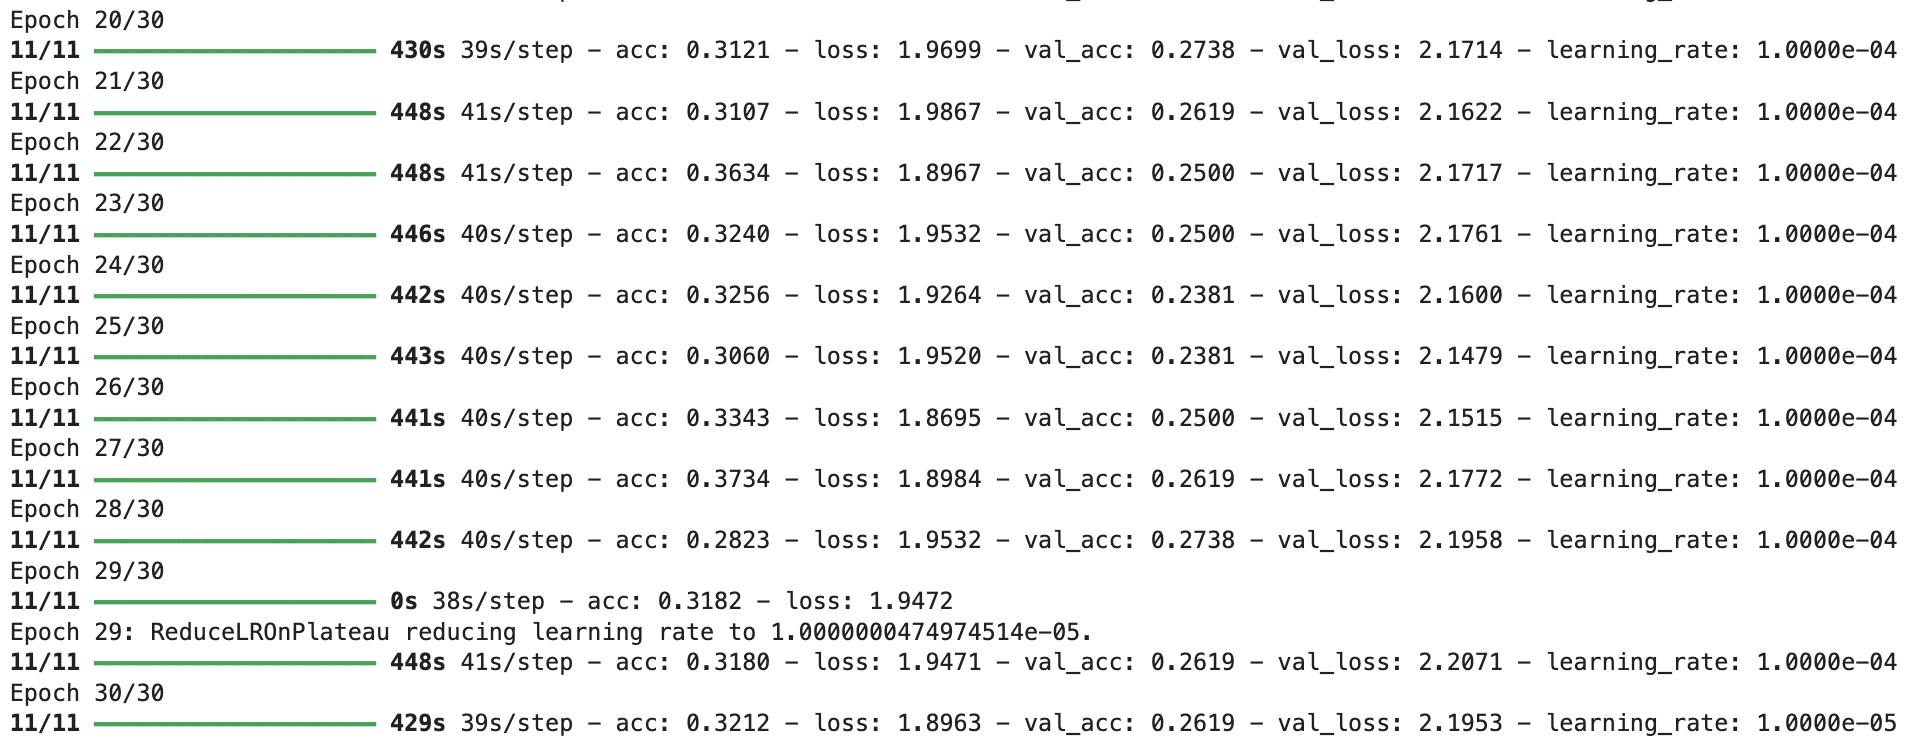

In [21]:
mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min',
    verbose= 1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=7,
    mode='min',
    verbose= 1
)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=128, kernel_size=3, strides=2)(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 121, 121, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 121, 121, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 121, 121, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 121, 121, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 121, 121, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 121, 121, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 60, 60, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 60, 60, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 60, 60, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 60, 60, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 60, 60, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,721,513 (10.38 MB)

 Trainable params: 2,718,697 (10.37 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [28]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=15,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 132s 12s/step - acc: 0.1964 - loss: 2.2042 - val_acc: 0.1310 - val_loss: 6.0436 - learning_rate: 0.0010
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 142s 13s/step - acc: 0.2777 - loss: 2.0978 - val_acc: 0.0952 - val_loss: 6.1885 - learning_rate: 0.0010
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 150s 14s/step - acc: 0.3341 - loss: 2.0118 - val_acc: 0.1071 - val_loss: 3.9481 - learning_rate: 0.0010
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 147s 13s/step - acc: 0.3492 - loss: 1.9751 - val_acc: 0.2976 - val_loss: 3.1515 - learning_rate: 0.0010
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 147s 13s/step - acc: 0.2920 - loss: 2.0182 - val_acc: 0.1071 - val_loss: 3.1410 - learning_rate: 0.0010
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 151s 14s/step - acc: 0.3654 - loss: 1.9171 - val_acc: 0.0714 - val_loss: 2.5509 - learning_rate: 0.0010
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 151s 14s/step - acc: 0.3089 - loss: 2.0069 - val_acc: 0.0595 - val_loss: 2.9477 - learning_rate: 0.0010
Epoch 

In [29]:
model.evaluate(test_generator, batch_size=16)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - acc: 0.2775 - loss: 2.2469


[2.2440171241760254, 0.26923078298568726]

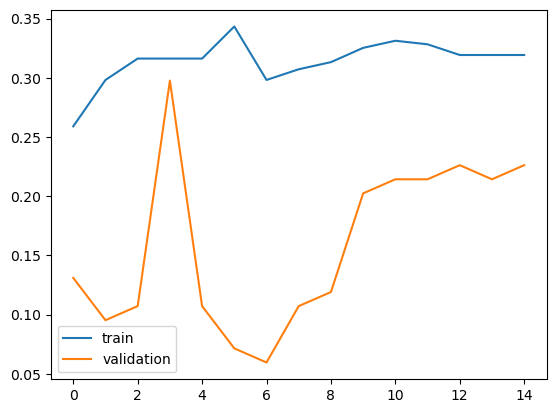

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [141]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, strides=1)(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=2, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
x = Dense(500, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(8, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_50 (InputLayer)     │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_292 (Conv2D)             │ (None, 242, 242, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_230         │ (None, 242, 242, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_289 (Activation)     │ (None, 242, 242, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_293 (Conv2D)             │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_231         │ (None, 240, 240, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_290 (Activation)     │ (None, 240, 240, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_294 (Conv2D)             │ (None, 238, 238, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_232         │ (None, 238, 238, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_291 (Activation)     │ (None, 238, 238, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 119, 119, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_295 (Conv2D)             │ (None, 117, 117, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_233         │ (None, 117, 117, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_292 (Activation)     │ (None, 117, 117, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_296 (Conv2D)             │ (None, 58, 58, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_234         │ (None, 58, 58, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_293 (Activation)     │ (None, 58, 58, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_297 (Conv2D)             │ (None, 58, 58, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_235         │ (None, 58, 58, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_294 (Activation)     │ (None, 58, 58, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_298 (Conv2D)             │ (None, 58, 58, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_236         │ (None, 58, 58, 256)    │         1,02

 Total params: 8,054,620 (30.73 MB)

 Trainable params: 8,048,988 (30.70 MB)

 Non-trainable params: 5,632 (22.00 KB)

In [47]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [51]:
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=30,
                    validation_data=validation_generator,
                    # callbacks = [mcp_cb, rlr_cb, ely_cb],
                    callbacks = [mcp_cb, rlr_cb]
                   )

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 419s 38s/step - acc: 0.2511 - loss: 2.3589 - val_acc: 0.0833 - val_loss: 175.9271 - learning_rate: 0.0010
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 435s 39s/step - acc: 0.2907 - loss: 2.1265 - val_acc: 0.0952 - val_loss: 66.8994 - learning_rate: 0.0010
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 434s 39s/step - acc: 0.2623 - loss: 2.1536 - val_acc: 0.1071 - val_loss: 23.3768 - learning_rate: 0.0010
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 441s 40s/step - acc: 0.2739 - loss: 2.1185 - val_acc: 0.0952 - val_loss: 10.0776 - learning_rate: 0.0010
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 434s 39s/step - acc: 0.3106 - loss: 2.0824 - val_acc: 0.0952 - val_loss: 12.6652 - learning_rate: 0.0010
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 450s 44s/step - acc: 0.2667 - loss: 2.1765 - val_acc: 0.1429 - val_loss: 3.2983 - learning_rate: 0.0010
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 442s 40s/step - acc: 0.2947 - loss: 2.0537 - val_acc: 0.1548 - val_loss: 2.7187 - learning_rate: 0.0010


#### ex) Other 파일 제외 후 예측

In [115]:
mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min',
    verbose= 1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=7,
    mode='min',
    verbose= 1
)

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 232 images belonging to 8 classes.
Found 59 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'sattriya': 7}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'sattriya': 7}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'sattriya': 7}


In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, strides=1, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=2, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(rate=0.4)(x)
output = Dense(8, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_116 (Conv2D)             │ (None, 121, 121, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 121, 121, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_116 (Activation)     │ (None, 121, 121, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_117 (Conv2D)             │ (None, 121, 121, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 121, 121, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_117 (Activation)     │ (None, 121, 121, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_118 (Conv2D)             │ (None, 121, 121, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_118         │ (None, 121, 121, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_118 (Activation)     │ (None, 121, 121, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_119 (Conv2D)             │ (None, 121, 121, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_119         │ (None, 121, 121, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_119 (Activation)     │ (None, 121, 121, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_120 (Conv2D)             │ (None, 60, 60, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_120         │ (None, 60, 60, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_120 (Activation)     │ (None, 60, 60, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_121 (Conv2D)             │ (None, 60, 60, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_121         │ (None, 60, 60, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_121 (Activation)     │ (None, 60, 60, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_122 (Conv2D)             │ (None, 60, 60, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_122         │ (None, 60, 60, 512)    │         2,04

 Total params: 7,909,424 (30.17 MB)

 Trainable params: 7,904,560 (30.15 MB)

 Non-trainable params: 4,864 (19.00 KB)

In [142]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [55]:
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=10,
                    validation_data=validation_generator,
                    # callbacks = [mcp_cb, rlr_cb, ely_cb],
                    callbacks = [mcp_cb, rlr_cb]
                   )

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 356s 45s/step - acc: 0.1295 - loss: 2.3931 - val_acc: 0.1356 - val_loss: 94.6696 - learning_rate: 0.0010
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 362s 45s/step - acc: 0.1231 - loss: 2.2073 - val_acc: 0.1186 - val_loss: 60.2588 - learning_rate: 0.0010
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 388s 48s/step - acc: 0.1561 - loss: 2.1930 - val_acc: 0.1356 - val_loss: 70.5492 - learning_rate: 0.0010
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 393s 54s/step - acc: 0.1680 - loss: 2.0592 - val_acc: 0.1356 - val_loss: 29.6470 - learning_rate: 0.0010
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 406s 51s/step - acc: 0.1271 - loss: 2.1146 - val_acc: 0.1356 - val_loss: 40.2111 - learning_rate: 0.0010
Epoch 6/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 6:12 53s/step - acc: 0.1562 - loss: 2.1585

KeyboardInterrupt: 

In [148]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=3)(input_tensor)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(filters=64, kernel_size=3, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=2, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,2)(x)

x = Conv2D(filters=128, kernel_size=3, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 2)(x)

# x = Conv2D(filters=128, kernel_size=3, kernel_initializer='he_normal')(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)

x = Flatten()(x)
# x = Dropout(rate=0.5)(x)
x = Dense(20, activation='relu')(x)
# x = Dropout(rate=0.3)(x)
# x = Dense(500, activation='relu')(x)

output = Dense(8, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_52 (InputLayer)     │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_309 (Conv2D)             │ (None, 242, 242, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_306 (Activation)     │ (None, 242, 242, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_310 (Conv2D)             │ (None, 240, 240, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_307 (Activation)     │ (None, 240, 240, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_311 (Conv2D)             │ (None, 118, 118, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_245         │ (None, 118, 118, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_308 (Activation)     │ (None, 118, 118, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_312 (Conv2D)             │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_246         │ (None, 58, 58, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_309 (Activation)     │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_313 (Conv2D)             │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_247         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_310 (Activation)     │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_314 (Conv2D)             │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_248         │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_311 (Activation)     │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_36 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 20)             │        92,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 8)              │           16

 Total params: 380,892 (1.45 MB)

 Trainable params: 380,124 (1.45 MB)

 Non-trainable params: 768 (3.00 KB)

In [149]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(1e-6), loss=CategoricalCrossentropy(), metrics=['acc'])

In [150]:
history = model.fit(train_generator,
                    batch_size=2,
                    epochs=100,
                    validation_data=validation_generator,
                    # callbacks = [mcp_cb, rlr_cb, ely_cb],
                    callbacks = [mcp_cb, rlr_cb],
                    shuffle=True
                   )

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - acc: 0.1142 - loss: 2.7169 - val_acc: 0.1525 - val_loss: 2.0886 - learning_rate: 1.0000e-06
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - acc: 0.1189 - loss: 2.7582 - val_acc: 0.1695 - val_loss: 2.0832 - learning_rate: 1.0000e-06
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - acc: 0.1317 - loss: 2.5792 - val_acc: 0.1356 - val_loss: 2.0808 - learning_rate: 1.0000e-06
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - acc: 0.1384 - loss: 2.6152 - val_acc: 0.1525 - val_loss: 2.0773 - learning_rate: 1.0000e-06
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - acc: 0.1007 - loss: 2.6269 - val_acc: 0.1695 - val_loss: 2.0768 - learning_rate: 1.0000e-06
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - acc: 0.1021 - loss: 2.5565 - val_acc: 0.1525 - val_loss: 2.0755 - learning_rate: 1.0000e-06
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - acc: 0.1481 - loss: 2.5788 - val_acc: 0.1525 - val_loss: 2.0744 - learning_rate: 1.0000e-06

# learning_rate 가 매우 낮을때도 loss 값이 증가되는 추세 확인

In [168]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=3)(input_tensor)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(filters=64, kernel_size=3, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=2, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,2)(x)

x = Conv2D(filters=128, kernel_size=3, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(filters=256, kernel_size=3, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Flatten()(x)
# x = Dropout(rate=0.5)(x)
x = Dense(20, activation='relu')(x)
# x = Dropout(rate=0.3)(x)
# x = Dense(500, activation='relu')(x)

output = Dense(8, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_58 (InputLayer)     │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_334 (Conv2D)             │ (None, 242, 242, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_325 (Activation)     │ (None, 242, 242, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_335 (Conv2D)             │ (None, 240, 240, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_326 (Activation)     │ (None, 240, 240, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_336 (Conv2D)             │ (None, 118, 118, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_264         │ (None, 118, 118, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_327 (Activation)     │ (None, 118, 118, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_337 (Conv2D)             │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_265         │ (None, 58, 58, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_328 (Activation)     │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_338 (Conv2D)             │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_266         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_329 (Activation)     │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_339 (Conv2D)             │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_267         │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_330 (Activation)     │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_340 (Conv2D)             │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_268         │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,808,092 (6.90 MB)

 Trainable params: 1,805,788 (6.89 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [169]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(1e-5), loss=CategoricalCrossentropy(), metrics=['acc'])

In [170]:
history = model.fit(train_generator,
                    batch_size=4,
                    epochs=50,
                    validation_data=validation_generator,
                    # callbacks = [mcp_cb, rlr_cb, ely_cb],
                    callbacks = [mcp_cb, rlr_cb],
                    shuffle=True
                   )

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.1223 - loss: 2.2330 - val_acc: 0.1695 - val_loss: 2.0803 - learning_rate: 1.0000e-05
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.1308 - loss: 2.2568 - val_acc: 0.1017 - val_loss: 2.0677 - learning_rate: 1.0000e-05
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - acc: 0.1131 - loss: 2.2152 - val_acc: 0.1356 - val_loss: 2.0676 - learning_rate: 1.0000e-05
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - acc: 0.1597 - loss: 2.1207 - val_acc: 0.1525 - val_loss: 2.0704 - learning_rate: 1.0000e-05
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.1509 - loss: 2.0616
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - acc: 0.1519 - loss: 2.0648 - val_acc: 0.1356 - val_loss: 2.0735 - learning_rate: 1.0000e-05
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - acc: 0.1860 - loss: 2.0654 - val_acc: 0.1525 - val_loss: 2.0741 - learning_rate: 1.0000e-06
Epoch 7


KeyboardInterrupt



# 결론.

- 훈련데이터가 부족하여 layer 층을 높이고 이미지 size를 조절한다고 해서 모델 훈련 시 적합한 패턴을 찾지 못하였다고 판단하며,
  train, test, validation 의 target의 이미지에 대하여 어느정도 일관된 개수는 유지 되어야 한다고 생각하였습니다.

- Convolution backborn 을 추가할 때 확인 시에는 loss 값과 val_loss 값의 변화에 대한 부분을 서로 비교하며 낮아지는 수치를 지향해야 하며,
  발산한는 부분을 신경쓰며 모델을 생성해야할 것으로 판단됩니다.

# 번외. 사전 훈련 모델 Inception Network 사용

In [54]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        # A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.5),
        # 이미지의 크기가 다르고 target 위치가 다를 수 도 있다고 판단
        # A.RandomResizedCrop(height=244, width=244, scale=(0.1, 0.5), p=0.3),
        A.ChannelShuffle(p=0.3),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 232 images belonging to 8 classes.
Found 59 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'sattriya': 7}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'sattriya': 7}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'sattriya': 7}


In [56]:
mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min',
    verbose= 1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=7,
    mode='min',
    verbose= 1
)

In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Concatenate

def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, 
                     filters_pool_reduce, name=None):
   
    # 첫번째 1x1 Conv
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    # 3x3 적용 전 1x1 conv
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)
    
    # 5x5 적용 전 1x1 Conv
    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool = Conv2D(filters_pool_reduce, (1, 1), padding='same', activation='relu')(pool)
    
    # 1x1 결과, 3x3 결과, 5x5 결과, pool이후 1x1 결과 feature map을 채널(axis=-1) 기준으로 Concat 적용. 
    # Concatenate는 사이즈는 그대로이고, 각 채널 수를 더한다. 즉, 그대로 뒤에 연결된다.
    output = Concatenate(axis=-1, name=name)([conv_1x1, conv_3x3, conv_5x5, pool])
    return output

In [58]:
def googlenet(in_shape=(224, 224, 3), n_classes=10):
    input_tensor = Input(in_shape)

    x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7_2')(input_tensor)
    x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3_2')(x)
    x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3_1')(x)
    x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3_1')(x)
    x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3_2')(x)
    
    # 첫번째 inception 모듈
    x = inception_module(x, filters_1x1=64,
                         filters_3x3_reduce=96,
                         filters_3x3=128,
                         filters_5x5_reduce=16,
                         filters_5x5=32,
                         filters_pool_reduce=32,
                         name='inception_3a')
    # 두번째 inception 모듈
    x = inception_module(x,
                         filters_1x1=128,
                         filters_3x3_reduce=128,
                         filters_3x3=192,
                         filters_5x5_reduce=32,
                         filters_5x5=96,
                         filters_pool_reduce=64,
                         name='inception_3b')

    x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3_2')(x)
    
    # 세번째 inception 모듈
    x = inception_module(x,
                         filters_1x1=192,
                         filters_3x3_reduce=96,
                         filters_3x3=208,
                         filters_5x5_reduce=16,
                         filters_5x5=48,
                         filters_pool_reduce=64,
                         name='inception_4a')
    # 네번째 inception 모듈
    x = inception_module(x,
                         filters_1x1=160,
                         filters_3x3_reduce=112,
                         filters_3x3=224,
                         filters_5x5_reduce=24,
                         filters_5x5=64,
                         filters_pool_reduce=64,
                         name='inception_4b')
    
    # 다섯번째 inception 모듈
    x = inception_module(x,
                         filters_1x1=128,
                         filters_3x3_reduce=128,
                         filters_3x3=256,
                         filters_5x5_reduce=24,
                         filters_5x5=64,
                         filters_pool_reduce=64,
                         name='inception_4c')
    # 여섯번째 inception 모듈
    x = inception_module(x,
                         filters_1x1=112,
                         filters_3x3_reduce=144,
                         filters_3x3=288,
                         filters_5x5_reduce=32,
                         filters_5x5=64,
                         filters_pool_reduce=64,
                         name='inception_4d')
    # 일곱번째 inception 모듈
    x = inception_module(x,
                         filters_1x1=256,
                         filters_3x3_reduce=160,
                         filters_3x3=320,
                         filters_5x5_reduce=32,
                         filters_5x5=128,
                         filters_pool_reduce=128,
                         name='inception_4e')

    x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3_2')(x)
    # 여덟번째 inception 모듈
    x = inception_module(x,
                         filters_1x1=256,
                         filters_3x3_reduce=160,
                         filters_3x3=320,
                         filters_5x5_reduce=32,
                         filters_5x5=128,
                         filters_pool_reduce=128,
                         name='inception_5a')
    # 아홉번째 inception 모듈
    x = inception_module(x,
                         filters_1x1=384,
                         filters_3x3_reduce=192,
                         filters_3x3=384,
                         filters_5x5_reduce=48,
                         filters_5x5=128,
                         filters_pool_reduce=128,
                         name='inception_5b')

    x = GlobalAveragePooling2D(name='avg_pool_5_3x3_1')(x)
    x = Dropout(0.5)(x)
    output = Dense(n_classes, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

In [71]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint

def vggnet(input_shape=(224, 224, 3), n_classes=10):
    input_tensor = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=1, name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(units = 120, activation = 'relu')(x)
    x = Dropout(0.5)(x)

    output = Dense(units = n_classes, activation = 'softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

model = vggnet(input_shape=(244, 244, 3), n_classes=8)

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 244, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 244, 244, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 243, 243, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 243, 243, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 243, 243, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 121, 121, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 121, 121, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 121, 121, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 121, 121, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 60, 60, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 60, 60, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 60, 60, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 30, 30, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        61,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           968 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,777,216 (56.37 MB)

 Trainable params: 14,777,216 (56.37 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# model = googlenet((244, 244, 3), n_classes=8)

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 244, 244,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_1_7x7_2        │ (None, 122, 122,  │      9,472 │ input_layer_8[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pool_1_3x3_2    │ (None, 61, 61,    │          0 │ conv_1_7x7_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_2a_3x3_1       │ (None, 61, 61,    │      4,160 │ max_pool_1_3x3_2… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_2b_3x3_1       │ (None, 61, 61,    │    110,784 │ conv_2a_3x3_1[0]… │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pool_2_3x3_2    │ (None, 31, 31,    │          0 │ conv_2b_3x3_1[0]… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_433 (Conv2D) │ (None, 31, 31,    │     18,528 │ max_pool_2_3x3_2… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_435 (Conv2D) │ (None, 31, 31,    │      3,088 │ max_pool_2_3x3_2… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_72    │ (None, 31, 31,    │          0 │ max_pool_2_3x3_2… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_432 (Conv2D) │ (None, 31, 31,    │     12,352 │ max_pool_2_3x3_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_434 (Conv2D) │ (None, 31, 31,    │    110,720 │ conv2d_433[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_436 (Conv2D) │ (None, 31, 31,    │     12,832 │ conv2d_435[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_437 (Conv2D) │ (None, 31, 31,    │      6,176 │ max_pooling2d_72… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_3a        │ (None, 31, 31,    │          0 │ conv2d_432[0][0], │
│ (Concatenate)       │ 256)              │            │ conv2d_434[0][0], │
│                     │                   │            │ conv2d_436[0][0], │
│                     │                   │            │ conv2d_437[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_439 (Conv2D) │ (None, 31, 31,    │     32,896 │ inception_3a[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_441 (Conv2D) │ (None, 31, 31,    │      8,224 │ inception_3a[0][… │
│                     │ 32)               │            │                 

 Total params: 5,981,752 (22.82 MB)

 Trainable params: 5,981,752 (22.82 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [73]:
history = model.fit(train_generator,
                    batch_size=8,
                    epochs=30,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb],
                    shuffle=True
                   )

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 471s 58s/step - acc: 0.0950 - loss: 2.1886 - val_acc: 0.1356 - val_loss: 2.0792 - learning_rate: 0.0010
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 447s 56s/step - acc: 0.1677 - loss: 2.0766 - val_acc: 0.1356 - val_loss: 2.0784 - learning_rate: 0.0010
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 451s 56s/step - acc: 0.1439 - loss: 2.0764 - val_acc: 0.1356 - val_loss: 2.0776 - learning_rate: 0.0010
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 451s 56s/step - acc: 0.0834 - loss: 2.0825 - val_acc: 0.1356 - val_loss: 2.0783 - learning_rate: 0.0010
Epoch 5/30
1/8 ━━━━━━━━━━━━━━━━━━━━ 6:44 58s/step - acc: 0.1250 - loss: 2.0817

KeyboardInterrupt: 